In [12]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [13]:
look_back = 8

In [14]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
df = df.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)
type(df)

pandas.core.frame.DataFrame

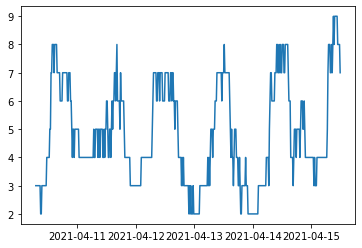

In [15]:
plt.plot(df["value"][500:1000])
plt.show()

In [16]:

df["timestamp"] = df.index
df["value"] = df["value"].replace(np.nan, 0)

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]





In [23]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

for i in test_generator.data:
    print(i)


7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
6.0
6.0
6.0
7.0
7.0
7.0
7.0
6.0
7.0
7.0
7.0
7.0
6.0
5.0
5.0
5.0
4.0
4.0
3.0
4.0
3.0
3.0
3.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
5.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
2.0
3.0
3.0
4.0
3.0
3.0
3.0
4.0
4.0
3.0
3.0
2.0
3.0
3.0
4.0
4.0
4.0
4.0
5.0
5.0
5.0
4.0
4.0
5.0
5.0
6.0
6.0
7.0
7.0
7.0
8.0
6.0
6.0
7.0
6.0
6.0
5.0
4.0
5.0
5.0
6.0
6.0
5.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
5.0
5.0
4.0
4.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
3.0
3.0
3.0
4.0
4.0
4.0
4.0
4.0
3.0
4.0
5.0
5.0
6.0
6.0
6.0
7.0
6.0
6.0
5.0
5.0
5.0
4.0
4.0
5.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
4.0
4.0
4.0
4.0
3.0
3.0


In [18]:
model_adam = Sequential()

model_adam.add(LSTM(25,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)
model_adam.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model_adam.add(Dense(1))

model_adam.compile(optimizer='adam', loss='mse')

num_epochs = 50

model_adam.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/50
484/484 [==============================] - 2s 4ms/step - loss: 2.1045
Epoch 2/50
484/484 [==============================] - 2s 3ms/step - loss: 0.7602
Epoch 3/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6635
Epoch 4/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6360
Epoch 5/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6172
Epoch 6/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6033
Epoch 7/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6033
Epoch 8/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6033
Epoch 9/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5947
Epoch 10/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5984
Epoch 11/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5744
Epoch 12/50
484/484 [==============================] - 2s 3ms/step - loss: 0.5813
Epoch 13/50
484/484 [====

In [19]:
model = Sequential()

model.add(LSTM(25,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)
model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

num_epochs = 50

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/50
484/484 [==============================] - 2s 3ms/step - loss: 2.6791
Epoch 2/50
484/484 [==============================] - 2s 3ms/step - loss: 0.8635
Epoch 3/50
484/484 [==============================] - 2s 3ms/step - loss: 0.7451
Epoch 4/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6950
Epoch 5/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6790
Epoch 6/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6600
Epoch 7/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6407
Epoch 8/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6380
Epoch 9/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6358
Epoch 10/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6252
Epoch 11/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6235
Epoch 12/50
484/484 [==============================] - 2s 3ms/step - loss: 0.6194
Epoch 13/50
484/484 [====

In [24]:
prediction = model_adam.predict([6,5,4,3,4,3,3,3,3,3,2,1,1,2,3])
prediction_a = model.predict(test_generator)

parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:200], prediction[8:208], label='prediction rmspop')
# plt.plot(date_test[:150], prediction_a[:150], label='prediction adam')
plt.plot(date_test[:200], parking_test[:200], label='actual')
plt.xticks(rotation=45)
plt.legend()
plt.show()

ValueError: in user code:

    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Niek\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 1]
